In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime

workdir = "D://Deep_learning//ResNetIC50_log//Dataset//MEYDC-6K"

In [2]:
# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]

dataset = np.load(workdir + "//MEYDC6K_dataset.npz") # input file
ss0 = np.load(workdir + '//MEYDC6K_dataset_r0.npz') # split for training and test

In [3]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [5]:
# In[15]:
ab =[]
for i in range(50,100):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

0 21


In [6]:
x.shape

(6074, 62718)

In [7]:
training_image_array.shape

(5467, 62718)

In [8]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [9]:
# train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
# test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)
# #input_shape = (img_rows, img_cols, 1)

In [10]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(5467, 62718) (5467,) (607, 62718) (607,)


In [11]:
inds = np.where(np.isnan(test_X))

In [12]:
inds

(array([], dtype=int64), array([], dtype=int64))

In [13]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (5467, 62718)
5467 train samples
607 test samples


In [14]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Fit regression model
svr_lin = SVR(C=0.01)
y_lin = svr_lin.fit(train_X, train_y).predict(test_X)


In [15]:
import matplotlib
from matplotlib import pyplot as plt

In [16]:
y_lin

array([1.97923162, 1.98437403, 1.97929717, 1.95863777, 1.9790983 ,
       1.87115177, 1.98090406, 1.97996943, 1.97633336, 1.96892841,
       1.97679807, 1.97641233, 1.96860788, 1.97513045, 1.98086914,
       1.96672345, 1.98152266, 1.85395583, 1.96577614, 1.97900784,
       1.9764248 , 1.97567413, 1.92240017, 1.97967507, 1.98265978,
       1.90800674, 1.84916515, 1.9746377 , 1.97228481, 1.9716565 ,
       1.9725001 , 1.97966466, 1.96315362, 1.98305997, 1.95818811,
       1.96874797, 1.93024504, 1.96078607, 1.95098663, 1.9615007 ,
       1.97952454, 1.87934033, 1.97539803, 1.96475206, 1.93355533,
       1.97004936, 1.97954451, 1.9559519 , 1.979535  , 1.98246899,
       1.96315569, 1.96016348, 1.97265306, 1.96330158, 1.98004727,
       1.96088647, 1.96391845, 1.84807175, 1.97943717, 1.98059093,
       1.97924871, 1.9641057 , 1.97691212, 1.9815996 , 1.97983641,
       1.94174889, 1.98137676, 1.96079394, 1.96607735, 1.97766067,
       1.8485075 , 1.96413609, 1.97913854, 1.9065625 , 1.98119

In [17]:
import pickle
import joblib
workdir = "D://Deep_learning//ResNetIC50_log//Result//MEYDC-6K//SVR"
joblib.dump(svr_lin, workdir + '//MEYDC6K_SVR_model.pkl') 


['D://Deep_learning//ResNetIC50_log//Result//MEYDC-6K//SVR//MEYDC6K_SVR_model.pkl']

In [18]:
a = pd.DataFrame(y_lin)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [19]:
c.to_csv(workdir + '//MEYDC6K_SVR_pred_obs_table.csv')

In [20]:
c

,Predicted,Test
0,1.979232,2.079442
1,1.984374,2.079442
2,1.979297,2.079442
3,1.958638,-2.723580
4,1.979098,2.079442
...,...,...
602,1.973064,2.079442
603,1.972936,2.079442
604,1.975213,2.079442
605,1.869765,2.079442


In [21]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.003047024255721848, intercept=1.9560745726634676, rvalue=0.1874372874497833, pvalue=3.323948366380493e-06, stderr=0.0006491962750429538)

In [22]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

-0.2984852160432687


In [23]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 2.222312639521638


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


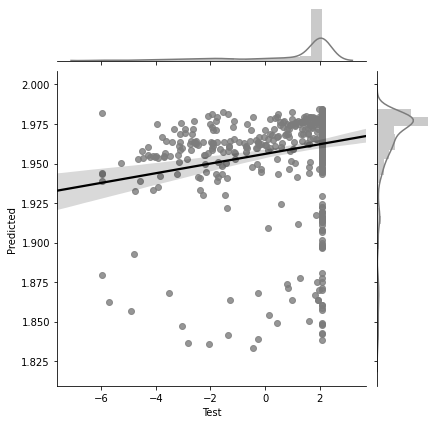

In [24]:
workdir = "D://Deep_learning//ResNetIC50_log//Figure//Backbone//MEYDC-6K"
import seaborn as sns

g = sns.jointplot(x="Test", y="Predicted", data=c, kind='reg', color='#7C7C7C',
                  joint_kws={'line_kws':{'color':'black'}})
g.savefig(workdir+ '//MEYDC6K_SVR.png', dpi=300)